In [ ]:
#pip install wordcloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('./Day 7 Students files/spam.csv', encoding='latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.columns=["Class", "Text"]

In [8]:
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df["Label"]=df["Class"].map({"ham":0,"spam":1})

In [10]:
# Dictionery
# d = {"ham":0,"spam":1}
# df["Label"]=df["Class"].map(d)

In [11]:
df.head()

,Class,Text,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
df["Class"].value_counts()

Class
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

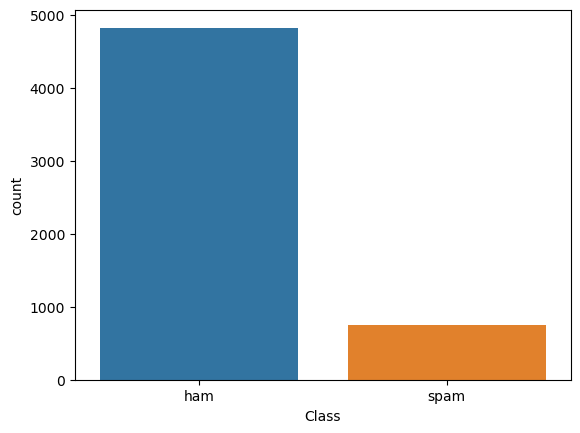

In [13]:
sns.countplot(x=df["Class"])

In [14]:
#NLP

In [15]:
df["Text"]=df['Text'].str.lower()
df["Text"]=df['Text'].str.replace('[^\w\s]','') #noktalama isaretklerini kaldir
df["Text"]=df['Text'].str.replace('\d+','') #Rakamlari kaldir
df["Text"]=df['Text'].str.replace('\n','').replace('\r','') #satirlari ve enter islemlerini kaldir

In [16]:
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [17]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('./Day 7 Students files/alice_mask.png'))
    wc=WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [18]:
ham=df[df['Class']=='ham']['Text']
spam=df[df['Class']=='spam']['Text']

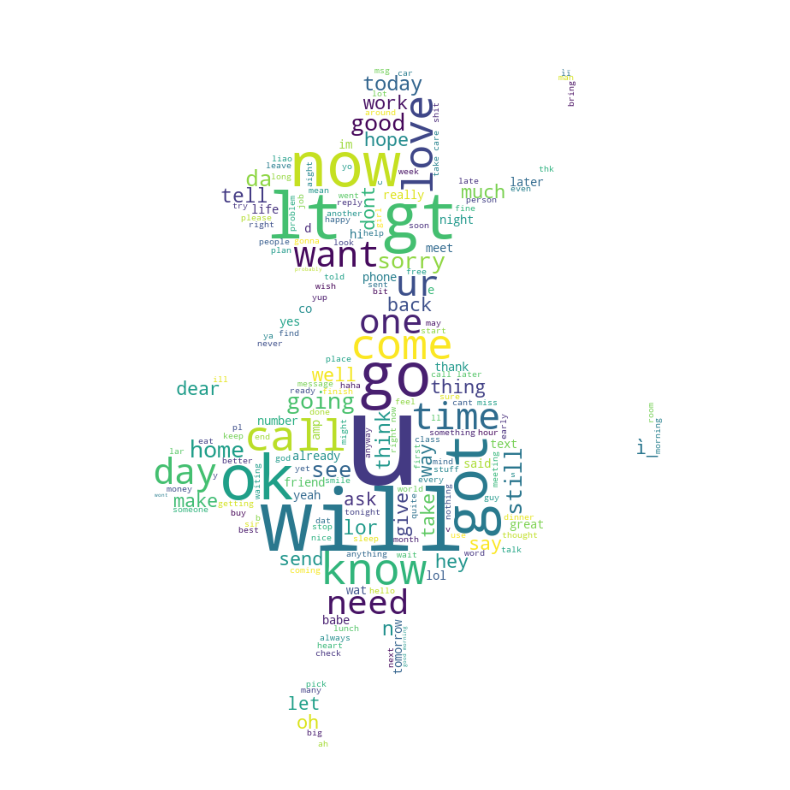

In [19]:
wc(ham, 'white')

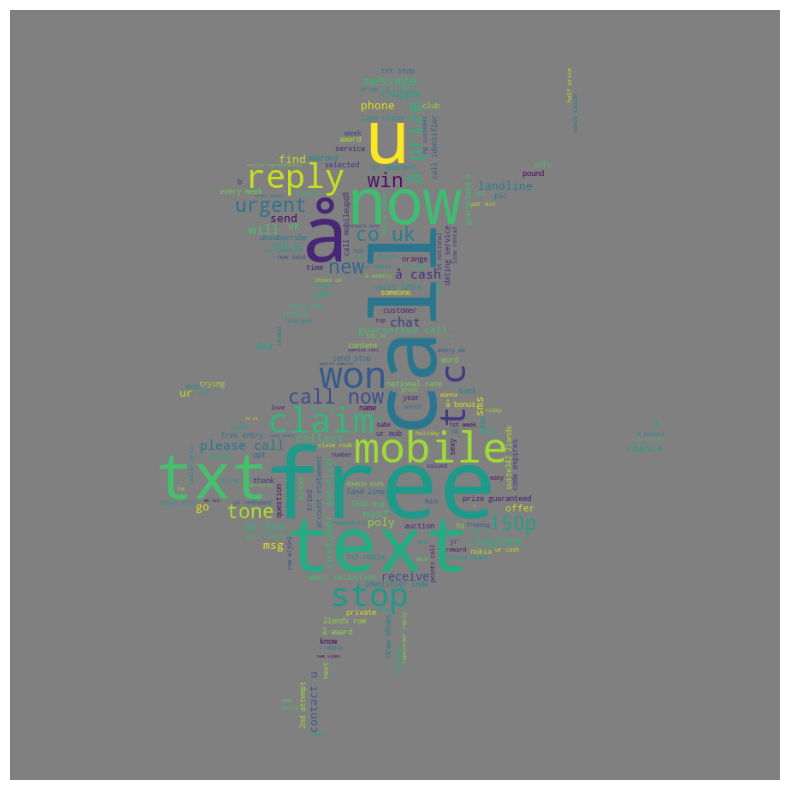

In [20]:
wc(spam, 'gray')

In [21]:
x=df["Text"]
y=df["Label"]

In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [24]:
from textblob import TextBlob
from nltk.stem import PorterStemmer

pr=PorterStemmer()

In [25]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [26]:
vect=CountVectorizer(stop_words="english",ngram_range=(1,2), analyzer=lemmafn)

x=vect.fit_transform(x)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [28]:
mb=MultinomialNB()

In [29]:
mb.fit(x_train,y_train)

MultinomialNB()

In [30]:
guess=mb.predict(x_test)

In [31]:
accuracy_score(y_test, guess)

0.9791816223977028

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
d=DecisionTreeClassifier()

In [34]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
guess=d.predict(x_test)

In [36]:
accuracy_score(y_test, guess)

0.9583632447954056